# Data exploration

Formula: 
- .>0: Positive relationship
- .<0: Negative relationship
- 0 or close to 0: No relationship
ȳ
 $$\text{cov(x,y)} = {1 \over n-1} * {\sum_{i=1}^n (x_i - x̄) * (y_i - ȳ)} $$

 $$\text{corr(x,y)} = {cov(x,y) \over sd(a) * sd(b)} $$



In [23]:
import pandas as pd;
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

pd.set_option('display.float_format', lambda x: '%.1f' % x)
plt.style.use("ggplot")

In [24]:
df = pd.read_csv('../../datasets/weather_history.regression.csv', sep=',')

df.head(5)
# df.describe()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.5,7.4,0.9,14.1,251.0,15.8,0.0,1015.1,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.4,7.2,0.9,14.3,259.0,15.8,0.0,1015.6,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.4,9.4,0.9,3.9,204.0,15.0,0.0,1015.9,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.3,5.9,0.8,14.1,269.0,15.8,0.0,1016.4,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.8,7.0,0.8,11.0,259.0,15.8,0.0,1016.5,Partly cloudy throughout the day.


In [25]:
# df.columns
df = df.drop([
        'Daily Summary', 
        'Loud Cover', 
        'Precip Type' # Precipitation
    ], axis=1) \
    .rename({
        'Formatted Date': 'fdate',
        'Summary': 'summary',
        'Temperature (C)': 'temp',
        'Apparent Temperature (C)': 'app_temp',
        'Humidity': 'hum',
        'Wind Speed (km/h)': 'wind_speed',
       'Wind Bearing (degrees)': 'wind_bearing', 
       'Visibility (km)': 'vis_km', 
       'Pressure (millibars)': 'press_mbar'
    }, axis=1) \
    .copy()

df.head(3)

,fdate,summary,temp,app_temp,hum,wind_speed,wind_bearing,vis_km,press_mbar
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,9.5,7.4,0.9,14.1,251.0,15.8,1015.1
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,9.4,7.2,0.9,14.3,259.0,15.8,1015.6
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,9.4,9.4,0.9,3.9,204.0,15.0,1015.9


In [26]:
# Formatting
df['fdate'] = pd.to_datetime(df['fdate'], yearfirst=True, utc=True, ) + pd.DateOffset(hours=2) # Local timezone

df['month'] = df['fdate'].dt.month
df['year'] = df['fdate'].dt.year
df['hour'] = df['fdate'].dt.hour 
# df['day'] = df['fdate'].dt.day
# df['day_month'] = df['fdate'].dt.strftime('%d.%m')
df['ymd'] = df['fdate'].dt.strftime('%y.%m.%d') #year.month.day

df = df.drop(['fdate'], axis=1)

df.head(3)

,summary,temp,app_temp,hum,wind_speed,wind_bearing,vis_km,press_mbar,month,year,hour,ymd
0,Partly Cloudy,9.5,7.4,0.9,14.1,251.0,15.8,1015.1,4,2006,0,06.04.01
1,Partly Cloudy,9.4,7.2,0.9,14.3,259.0,15.8,1015.6,4,2006,1,06.04.01
2,Mostly Cloudy,9.4,9.4,0.9,3.9,204.0,15.0,1015.9,4,2006,2,06.04.01


In [27]:
df.isna().sum()

summary         0
temp            0
app_temp        0
hum             0
wind_speed      0
wind_bearing    0
vis_km          0
press_mbar      0
month           0
year            0
hour            0
ymd             0
dtype: int64

In [28]:
def graphs(plot_func, features, cols=4, height=6):
    ceildiv = lambda a, b: -(a // -b)
    rows = ceildiv(len(features), cols)
    _, axes = plt.subplots(nrows=rows,ncols=cols, figsize=(20, height*rows))
    plt.subplots_adjust(hspace=0.5)
    for i, feature in enumerate(features):
        loc = axes[i // cols, i % cols] if rows > 1 and cols > 1 else axes[i % cols]
        plot_func(feature, loc)
    return plt 

## Data distribution

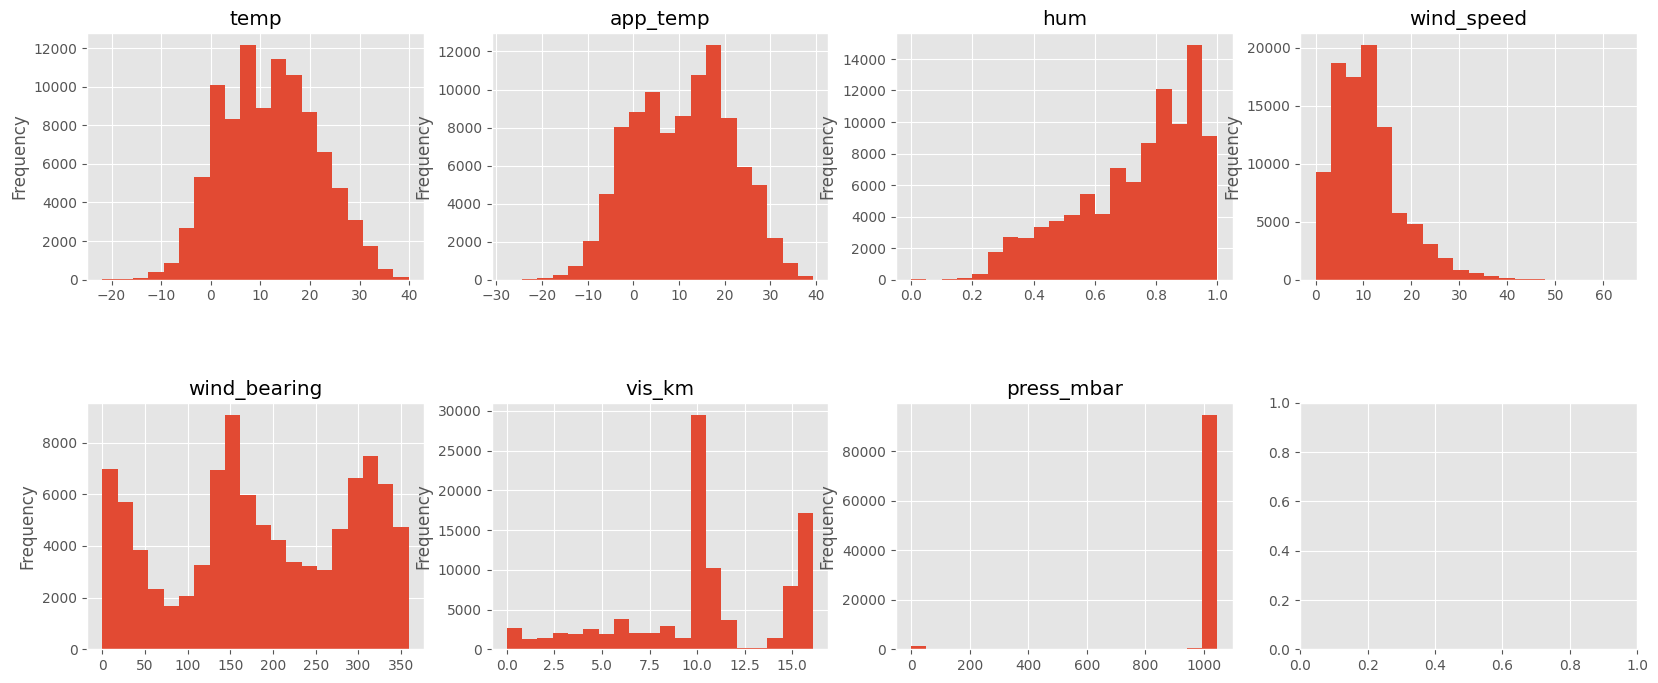

In [29]:
continues_d = ['temp', 'app_temp', 'hum', 'wind_speed', 'wind_bearing', 'vis_km', 'press_mbar']
plots = graphs(lambda f, loc: df[f].plot(kind='hist', ax=loc, title=f, bins=20), continues_d, cols=4, height=4)

plt.show() 

# Categorical distributions

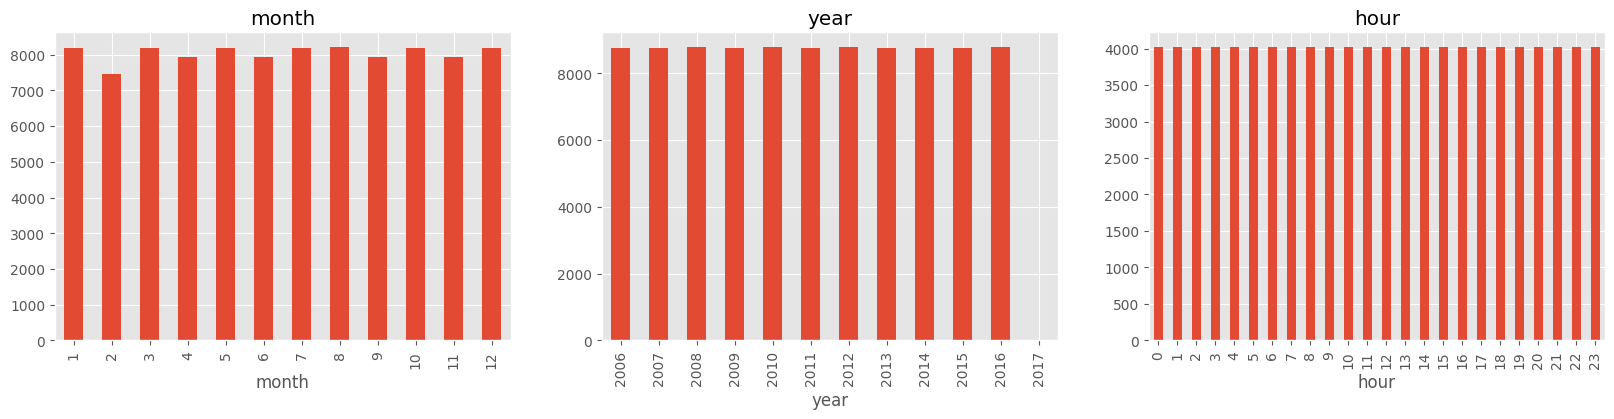

In [30]:
categorical_d = ['month', 'year', 'hour']
plots = graphs(lambda f, loc: df[f].value_counts().sort_index().plot(kind='bar', ax=loc, title=f), categorical_d, cols=3, height=4)
plt.show()

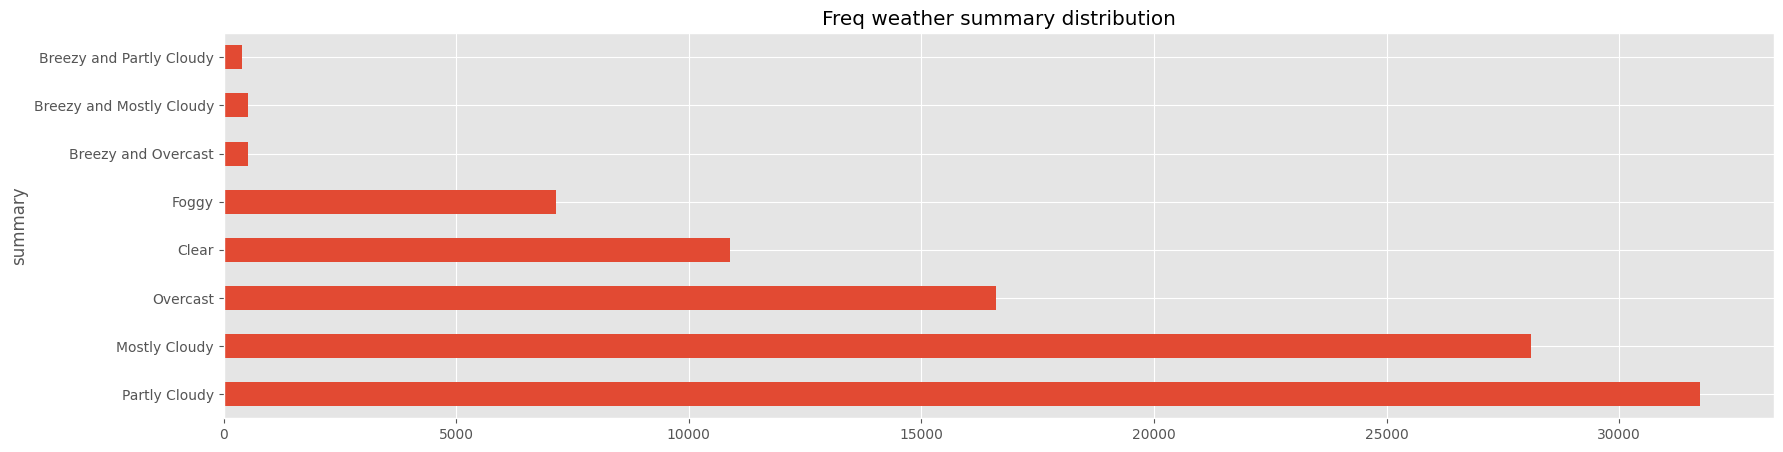

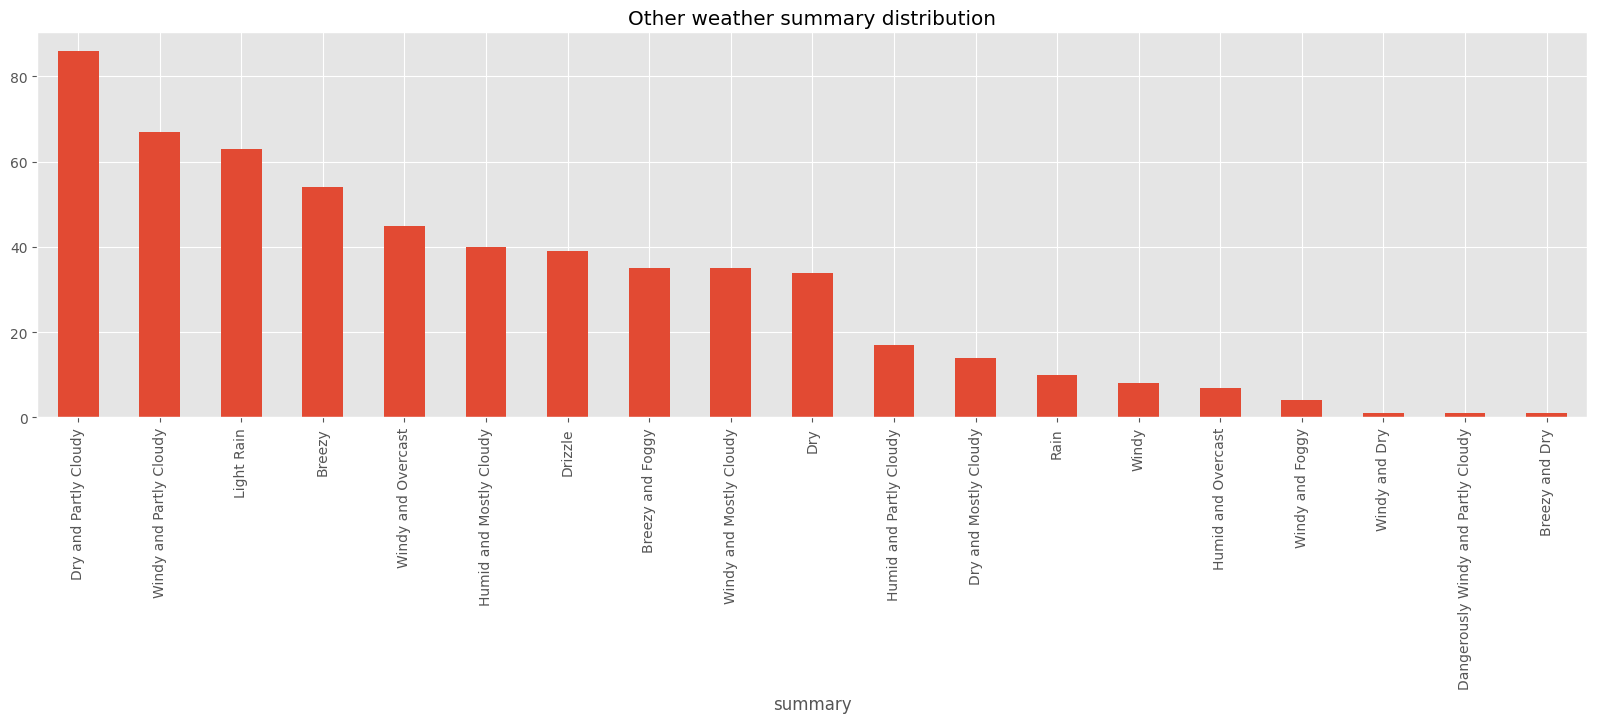

In [31]:
df['summary'].value_counts().loc[lambda r: r >= 200].plot(kind='barh', title='Freq weather summary distribution', figsize=(20, 5))
plt.show()
df['summary'].value_counts().loc[lambda r: r < 200].plot(kind='bar', title='Other weather summary distribution', figsize=(20, 5))
plt.show()

## Correlation
Correlation can be determined between descriptive features using Pair grids

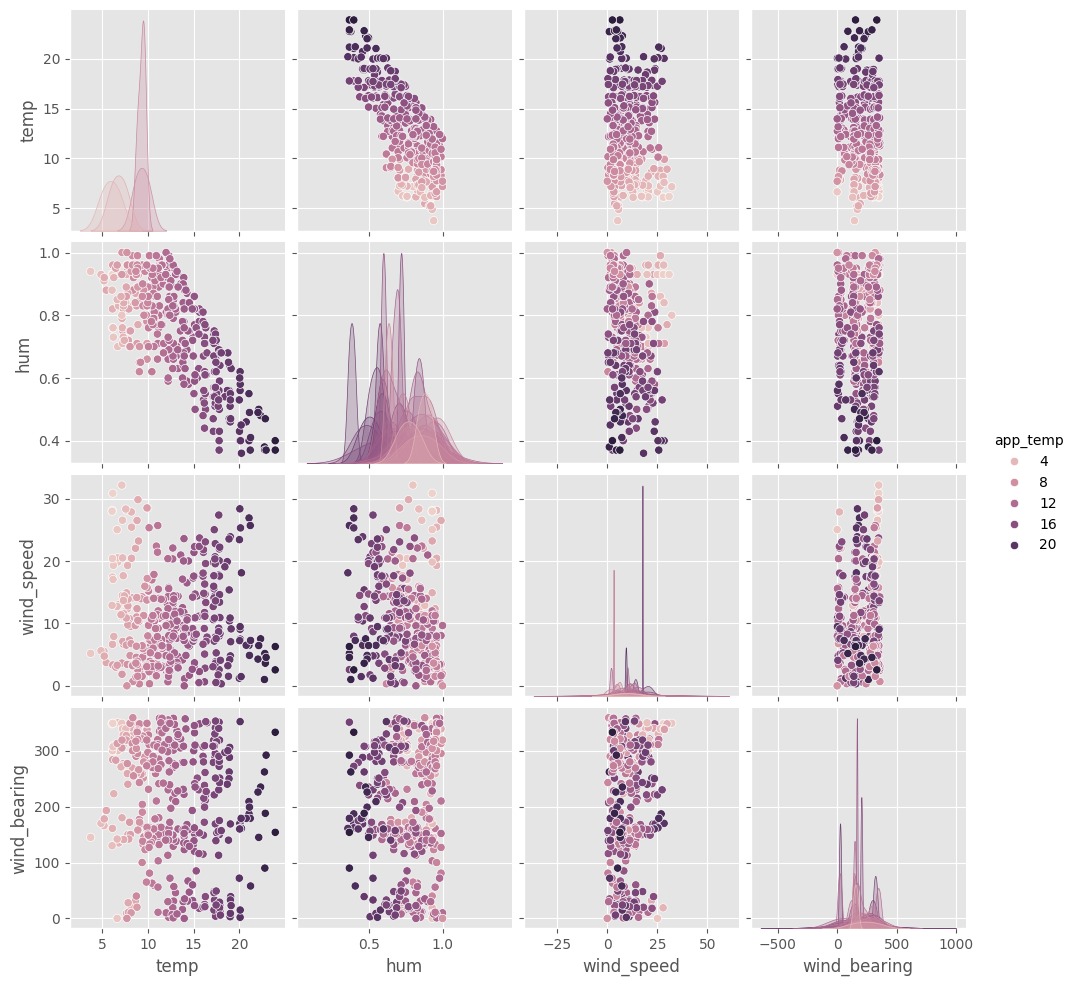

In [32]:
sns.pairplot(df.head(400), vars=['temp', 'hum', 'wind_speed', 'wind_bearing'], hue='app_temp')

Correlation can also be detected if features are plotted with the target feature. 

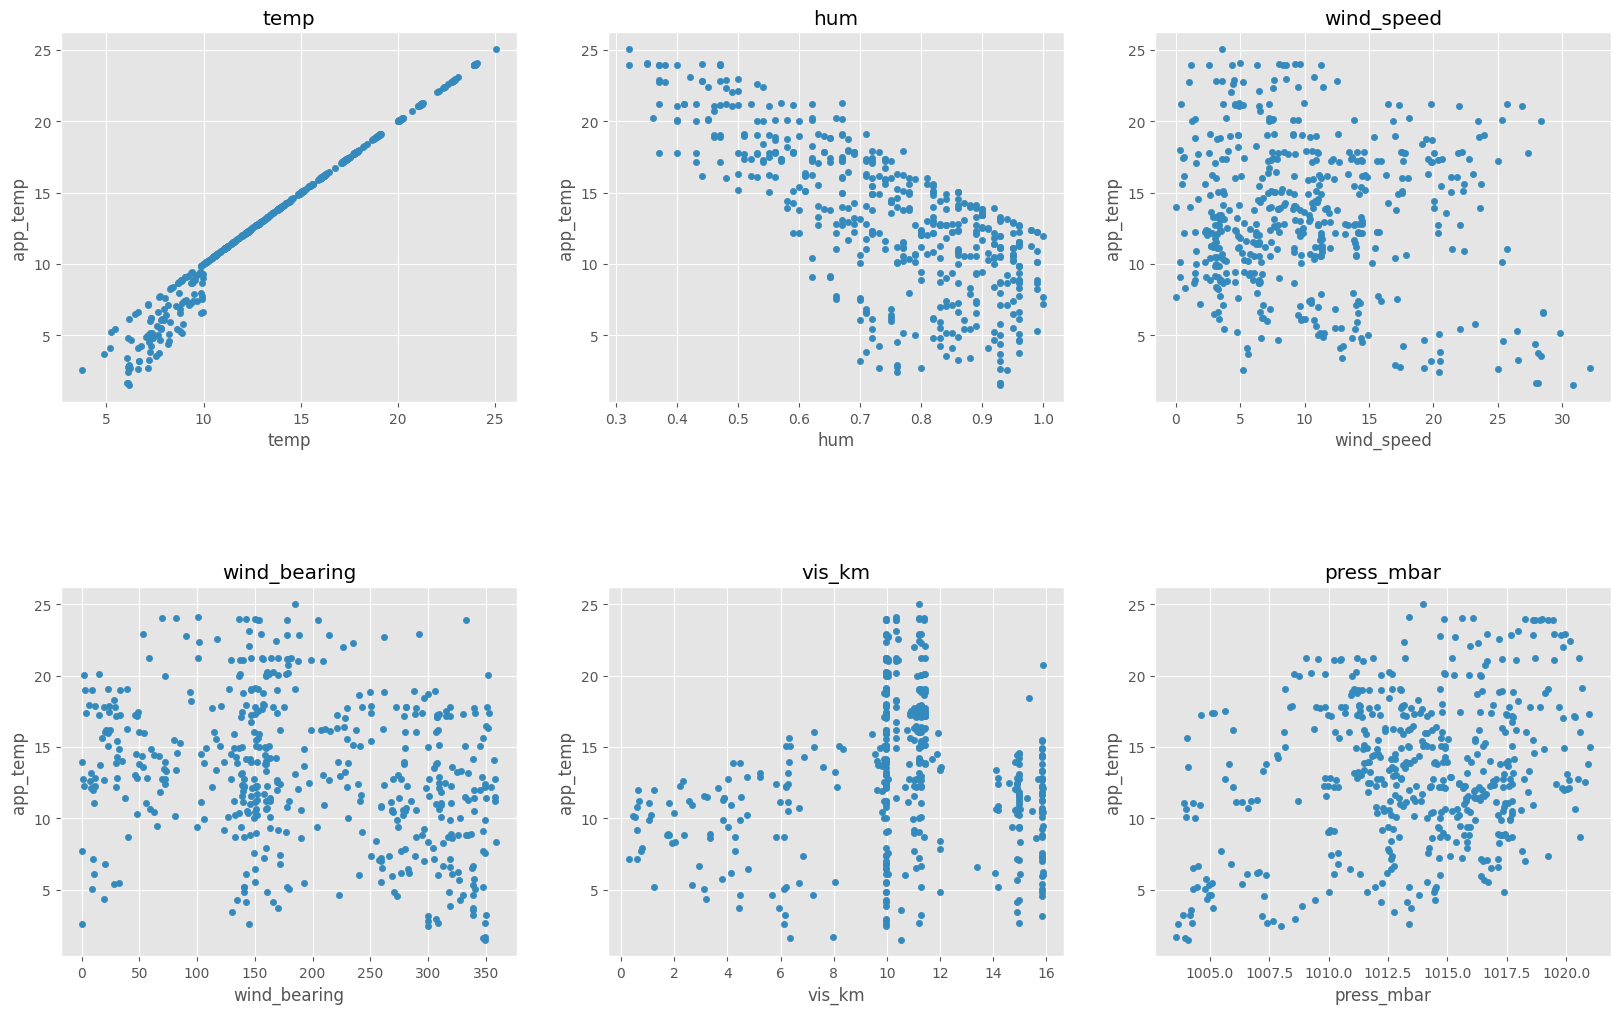

In [33]:
t = 'app_temp'
continues_d = ['temp', 'hum', 'wind_speed', 'wind_bearing', 'vis_km', 'press_mbar']
# categorical_d = ['summary', 'month', 'year', 'hour']

subset = df.head(500)
plt = graphs(lambda f, loc: subset.plot(kind='scatter', x=f, y=t, ax=loc, title=f), continues_d, cols=3, height=6)

plt.show() 